# Importing librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
#hide uncessary warnings
import warnings
warnings.filterwarnings('ignore')

# Loading

In [3]:
data_frame = pd.read_csv(r"C:\Users\Lina Ben Salem\Desktop\diabetes project\diabetes.csv")

In [4]:
data_frame.shape

(768, 9)

In [5]:
data_frame.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data_frame.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


#### Definition of features 

    From the metadata on the data source we have the following definition of the features.
<table>
  <tr>
    <th>Feature</th>
    <th>Description</th>
    <th>Comments</th>
  </tr>
  <tr>
    <td>Pregnancies	</td>
    <td>number of pregnancies	</td>
    <td> </td>
  </tr>
  <tr>
    <td>Glucose</td>
    <td>Plasma glucose concentration a 2 hours in an oral glucose tolerance test</td>
    <td> </td>
  </tr>
  <tr>
    <td>Blood Pressure</td>
    <td>Blood Pressure (mm Hg)</td>
    <td> </td>
  </tr>
  <tr>
    <td>Skin Thickness</td>
    <td>Triceps skin fold thickness (mm)</td>
    <td> </td>
  </tr>
  <tr>
    <td>Insulin</td>
    <td>2-Hour serum insulin (mu U/ml)</td>
    <td> </td>
  </tr>
  <tr>
    <td>BMI</td>
    <td>Body mass index (weight in kg/(height in m)^2)	</td>
    <td> </td>
  </tr>
    <tr>
    <td>DiabetesPedigreeFunction</td>
    <td>Diabetes pedigree function indicates the function which scores likelihood of diabetes based on family history	</td>
    <td> </td>
  </tr>
    <tr>
    <td>Age</td>
    <td>Age (years)	</td>
    <td> </td>
  </tr>
    <tr>
    <td>skin</td>
        <td> <bold> We still don't know about it !</bold>	</td>
    <td> </td>
  </tr>
    <tr>
    <td>diabetes</td>
        <td> <bold> Class variable (1=True, 0=False) </bold>	</td>
    <td><bold> Why is our data boolean (True/False)? </bold></td>
  </tr>
</table>
        

# Checking for missing data

In [7]:
print (data_frame.isnull().values.any())


False


# Correlation matrix

In [8]:
correlation = data_frame.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

#### => we create a heatmaap in order to see the correlations better

<AxesSubplot:>

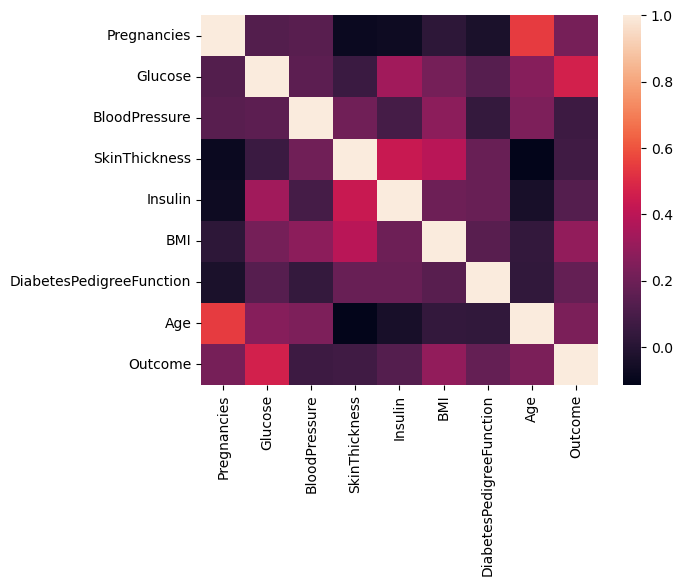

In [9]:
sns.heatmap(correlation)

### Mold Data
#### Data Types
Inspect data types to see if there are any issues. Data should be numeric.

In [10]:
data_frame.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


###  => all the data in numeris , so no need to change its type

# Spliting the data

70% for training, 30% for testing

In [53]:


feature_col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class_names = ['Outcome']
#we can use pop 

X = data_frame[feature_col_names].values     # predictor feature columns (8 X m)
y = data_frame[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything

We check to ensure we have the the desired 70% train, 30% test split of the data

In [54]:
trainval = (1.0 * len(X_train)) / (1.0 * len(data_frame.index))
testval = (1.0 * len(X_test)) / (1.0 * len(data_frame.index))
print("{0:0.2f}% in training set".format(trainval * 100))
print("{0:0.2f}% in test set".format(testval * 100))

69.92% in training set
30.08% in test set


Verifying predicted value was split correctly

In [55]:
print("Original True  : {0} ({1:0.2f}%)".format(len(data_frame.loc[data_frame['Outcome'] == 1]), (len(data_frame.loc[data_frame['Outcome'] == 1])/len(data_frame.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(data_frame.loc[data_frame['Outcome'] == 0]), (len(data_frame.loc[data_frame['Outcome'] == 0])/len(data_frame.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))
#making sure the data is balanced

Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


 ####   Post-split Data Preparation

#### Hidden missing values

In [14]:
data_frame.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


How many rows have unexpected 0 values?

In [15]:
print("# rows in dataframe {0}".format(len(data_frame)))
print("# rows missing glucose_conc: {0}".format(len(data_frame.loc[data_frame['Glucose'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(data_frame.loc[data_frame['BloodPressure'] == 0])))
print("# rows missing thickness: {0}".format(len(data_frame.loc[data_frame['SkinThickness'] == 0])))
print("# rows missing insulin: {0}".format(len(data_frame.loc[data_frame['Insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(data_frame.loc[data_frame['BMI'] == 0])))
print("# rows missing diab_pred: {0}".format(len(data_frame.loc[data_frame['DiabetesPedigreeFunction'] == 0])))
print("# rows missing age: {0}".format(len(data_frame.loc[data_frame['Age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


#### Impute with the mean

In [16]:
from sklearn.impute import SimpleImputer
import numpy as np
#Impute with mean all 0 readings

fill_0  = SimpleImputer(missing_values=0, strategy='mean')


X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

#### Training Initial Algorithm - Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB() 

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

#### Performance on Training Data

In [18]:
# this returns array of predicted results
prediction_from_trained_data = nb_model.predict(X_train)

In [19]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our naive bayes model is : {0:.4f}".format(accuracy))

Accuracy of our naive bayes model is : 0.7542


In [20]:
#### Performance on Testing Data

In [21]:
# this returns array of predicted results from test_data
prediction_from_test_data = nb_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, prediction_from_test_data)

print ("Accuracy of our naive bayes model is: {0:0.4f}".format(accuracy))

Accuracy of our naive bayes model is: 0.7359


In [22]:
print ("Confusion Matrix")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, prediction_from_test_data, labels=[1, 0])))

Confusion Matrix
[[ 52  28]
 [ 33 118]]


In [23]:
print ("Classification Report")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, prediction_from_test_data, labels=[1, 0])))

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



#### RandomForest

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

#### Predict Training Data

In [25]:
rf_predict_train = rf_model.predict(X_train)

#get accuracy
rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)

#print accuracy
print ("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 1.0000


#### Predict Testing Data

In [26]:
rf_predict_test = rf_model.predict(X_test)

#get accuracy
rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))

Accuracy: 0.7403


In [27]:


print ("Confusion Matrix for Random Forest")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, rf_predict_test, labels=[1, 0])))

Confusion Matrix for Random Forest
[[ 52  28]
 [ 32 119]]

Classification Report

              precision    recall  f1-score   support

           1       0.62      0.65      0.63        80
           0       0.81      0.79      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



#### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print ("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))

print ("Confusion Matrix")

print (metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0]))

print ("")

print ("Classification Report")

print (metrics.classification_report(y_test, lr_predict_test, labels=[1, 0]))

Accuracy : 0.7489
Confusion Matrix
[[ 48  32]
 [ 26 125]]

Classification Report
              precision    recall  f1-score   support

           1       0.65      0.60      0.62        80
           0       0.80      0.83      0.81       151

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



In [29]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")  

# set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())

lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print( "Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print (metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1, 0])) 
print ("")
print ("Classification Report")
print (metrics.classification_report(y_test, lr_cv_predict_test, labels=[1,0]))

Accuracy: 0.7143
[[ 55  25]
 [ 41 110]]

Classification Report
              precision    recall  f1-score   support

           1       0.57      0.69      0.62        80
           0       0.81      0.73      0.77       151

    accuracy                           0.71       231
   macro avg       0.69      0.71      0.70       231
weighted avg       0.73      0.71      0.72       231



##### Support vector Machine

In [30]:
from sklearn.svm import SVC
# Create a RandomForestClassifier object
svm_model = SVC(kernel='linear', C=1, random_state=42)

svm_model.fit(X_train, y_train.ravel())

SVC(C=1, kernel='linear', random_state=42)

In [31]:
# this returns array of predicted results
prediction_from_trained_data = svm_model.predict(X_train)

In [32]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our SVM model is : {0:.4f}".format(accuracy))

Accuracy of our SVM model is : 0.7840


In [33]:
svm_predict_test = svm_model.predict(X_test)

#get accuracy
svm_accuracy_testdata = metrics.accuracy_score(y_test, svm_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(svm_accuracy_testdata))

Accuracy: 0.7359


In [34]:


print ("Confusion Matrix for Support Vector Amchine")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, svm_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, svm_predict_test, labels=[1, 0])))

Confusion Matrix for Support Vector Amchine
[[ 46  34]
 [ 27 124]]

Classification Report

              precision    recall  f1-score   support

           1       0.63      0.57      0.60        80
           0       0.78      0.82      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



In [35]:
from sklearn.neural_network import MLPClassifier
# Create a ANN object
ann_model = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500, random_state=42)

ann_model.fit(X_train, y_train.ravel())

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500, random_state=42)

In [36]:
# this returns array of predicted results
prediction_from_trained_data = ann_model.predict(X_train)

In [37]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our ANN model is : {0:.4f}".format(accuracy))

Accuracy of our ANN model is : 0.8045


In [38]:
ann_predict_test = ann_model.predict(X_test)

#get accuracy
ann_accuracy_testdata = metrics.accuracy_score(y_test, ann_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(ann_accuracy_testdata))

Accuracy: 0.7013


In [39]:


print ("Confusion Matrix for Artificial Neural Network")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, ann_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, ann_predict_test, labels=[ 1,0])))

Confusion Matrix for Artificial Neural Network
[[ 40  40]
 [ 29 122]]

Classification Report

              precision    recall  f1-score   support

           1       0.58      0.50      0.54        80
           0       0.75      0.81      0.78       151

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.66       231
weighted avg       0.69      0.70      0.70       231



## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

# create Gaussian Naive Bayes model object and train it with the data
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train.ravel())

DecisionTreeClassifier(random_state=42)

In [41]:
# this returns array of predicted results
prediction_from_trained_data = dt_model.predict(X_train)

In [42]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our DT model is : {0:.4f}".format(accuracy))

Accuracy of our DT model is : 1.0000


In [43]:
dt_predict_test = dt_model.predict(X_test)

#get accuracy
dt_accuracy_testdata = metrics.accuracy_score(y_test, dt_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(dt_accuracy_testdata))

Accuracy: 0.7143


In [44]:


print ("Confusion Matrix for DT")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, dt_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, dt_predict_test, labels=[ 1,0])))

Confusion Matrix for DT
[[ 52  28]
 [ 38 113]]

Classification Report

              precision    recall  f1-score   support

           1       0.58      0.65      0.61        80
           0       0.80      0.75      0.77       151

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.72      0.71      0.72       231



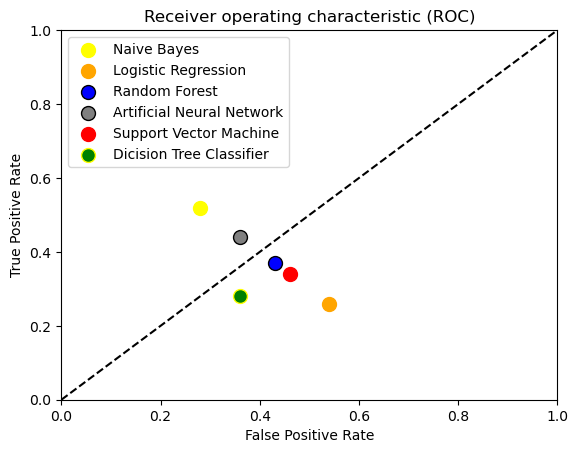

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# fpr, tpr
naive_bayes = np.array([0.28, 0.52])
logistic = np.array([0.54, 0.26])
random_forest = np.array([0.43, 0.37])
ann = np.array([0.36, 0.44])
svm = np.array([0.46, 0.34])
dt = np.array([0.52, 0.28])

#plotting
plt.scatter(naive_bayes[0], naive_bayes[1], label = 'Naive Bayes', facecolors='yellow', edgecolors='yellow', s=100)
plt.scatter(logistic[0], logistic[1], label = 'Logistic Regression', facecolors='orange', edgecolors='orange', s=100)
plt.scatter(random_forest[0], random_forest[1], label = 'Random Forest', facecolors='blue', edgecolors='black', s=100)
plt.scatter(ann[0], ann[1], label = 'Artificial Neural Network', facecolors='gray', edgecolors='black', s=100)
plt.scatter(svm[0], svm[1], label = 'Support Vector Machine', facecolors='red', edgecolors='red', s=100)
plt.scatter(ann[0], dt[1], label = 'Dicision Tree Classifier', facecolors='green', edgecolors='yellow', s=100)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc='upper left')

plt.show()